In [2]:
import cdsapi
import matplotlib.pyplot as plt
from pathlib import Path
import xarray as xr

Useful tutorial [here](https://retostauffer.org/code/Download-ERA5/)

In [4]:
c = cdsapi.Client()

Note that users must agree to the terms of service for each dataset being used before it can be exported.

In [11]:
def download_test_dataset(cdsapi_client):
    pressure_datapath = Path('../data/era5_test.grib')
    
    if not pressure_datapath.exists():
        cdsapi_client.retrieve('reanalysis-era5-pressure-levels', {
           "variable": "temperature",
           "pressure_level": "1000",
           "product_type": "reanalysis",
           "date": "2017-12-01/2017-12-31",
           "time": "12:00",
           "format": "grib"
           }, pressure_datapath)
    else:
        print('Dataset already downloaded!')
    
    return pressure_datapath    

In [10]:
pressure_datapath = download_test_dataset(c)

Dataset already downloaded!


The datasets are downloaded as [GRIB](https://en.wikipedia.org/wiki/GRIB) files, but ECMWF has a convenient python package which makes it easy to read them into xarray.

In [15]:
ds = xr.open_dataset(pressure_datapath, engine='cfgrib')

2019-05-07 10:25:25,790 INFO ecCodes library not found using name 'eccodes'.
2019-05-07 10:25:25,794 INFO ecCodes library not found using name 'libeccodes.so'.
2019-05-07 10:25:25,858 INFO ecCodes library found using name 'libeccodes'.


And its easy to plot these! woo

In [16]:
ds2d = ds.isel(time=0)

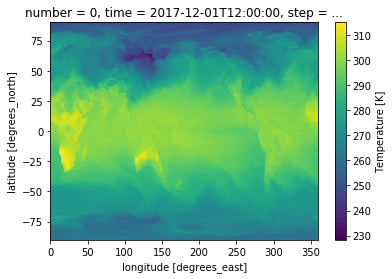

In [17]:
ds2d.t.plot()